 # Projet numérique : équations de LOKTA-VOLTERRA

## Importations et configuration générale

In [6]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 12] # mieux voir avec une figure plus grande
plt.rcParams['figure.dpi'] = 100


## Macros Latex

- \R
- \norme

$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\norme}[1]{\left\Vert #1\right\Vert}$

## Question 1

### Signification des termes

- $t$ est le temps
- $x_1(t)$ : le nombre positif de proies en vie à l'instant $t$
- $x_2(t)$ : le nombre positif de prédateurs en vie à l'instant $t$
- $\dot{x_1}(t)$ : la variation de la population de proies à l'instant $t$
- $\dot{x_2}(t)$ : la variation de la population de prédateurs à l'instant $t$
- $\alpha$ : le taux de reproduction intrinsèque des proies
- $\beta$ : le taux de prédation, c'est-à-dire le taux de mortalité des proies à cause des prédateurs
- $\gamma$ : le taux de reproduction des prédateurs liés à la présence des proies
- $\delta$ : le taux de mortalité intrinsèque des prédateurs

###  Points d'équilibre

On définit :

$\begin{array}{ccccc}
f & : & \mathbb{R}^2 & \to & \mathbb{R}^2 \\
 & & (x_1, x_2) & \mapsto &  
 \begin{pmatrix}
  x_1(\alpha-\beta x_2) \\
  -x_2(\gamma - \delta x_1) \\
\end{pmatrix}
\\
\end{array}$
et
$(E)$ : $(\dot{x_1}, \dot{x_2})=f(x_1, x_2)$

En revenant à la définition, on résout $f(x)=\begin{pmatrix}
  0 \\
  0 \\
\end{pmatrix}$ d'inconnue $x \in \mathbb{R}^2$.

Par disjonction de cas (si $x_1$ est nul ou non), on obtient $\begin{pmatrix}
  0 \\
  0 \\
\end{pmatrix}$
et
$\overline{x}=\begin{pmatrix}
  \frac{\alpha}{\beta} \\
  \frac{\gamma}{\delta} \\
\end{pmatrix}$ qui sont deux solutions distinctes.

### Stabilité

On calcule la matrice jacobienne de $f$, que l'on évalue ensuite en $0$ et en $\overline{x}$ :

$$
J_f(x) =
  \begin{bmatrix}
    \alpha - \beta x_2 & -\beta x_1 \\
    \delta x_2 & -(\gamma-\delta x_1)
  \end{bmatrix}
$$

D'où

$$
J_f(0) = 
\begin{bmatrix}
    \alpha & 0 \\
    0 & -\gamma
  \end{bmatrix}
\textrm{ et }
J_f(\overline{x}) = 
\begin{bmatrix}
    0 & -\beta \frac{\gamma}{\delta} \\
    \delta \frac{\alpha}{\beta} & 0
  \end{bmatrix}
$$

$\alpha > 0$ est valeur propre de $J_f(0)$ donc, par théorème, $0$ est un point d'équilibre instable. Les valeurs propres de $J_f(\overline{x})$ sont $\pm i \sqrt{\alpha\gamma}$, de parties réelles nulles. On ne peut donc rien conclure a priori.


## Question 2

In [7]:
# Choix des paramètres

alpha = 2/3
beta = 4/3
gamma = 1
delta = 1

nb_max = 2
nb_tot = 20

def lk(x1, x2):
    return np.array([x1*(alpha-beta*x2),-x2*(gamma-delta*x1)])

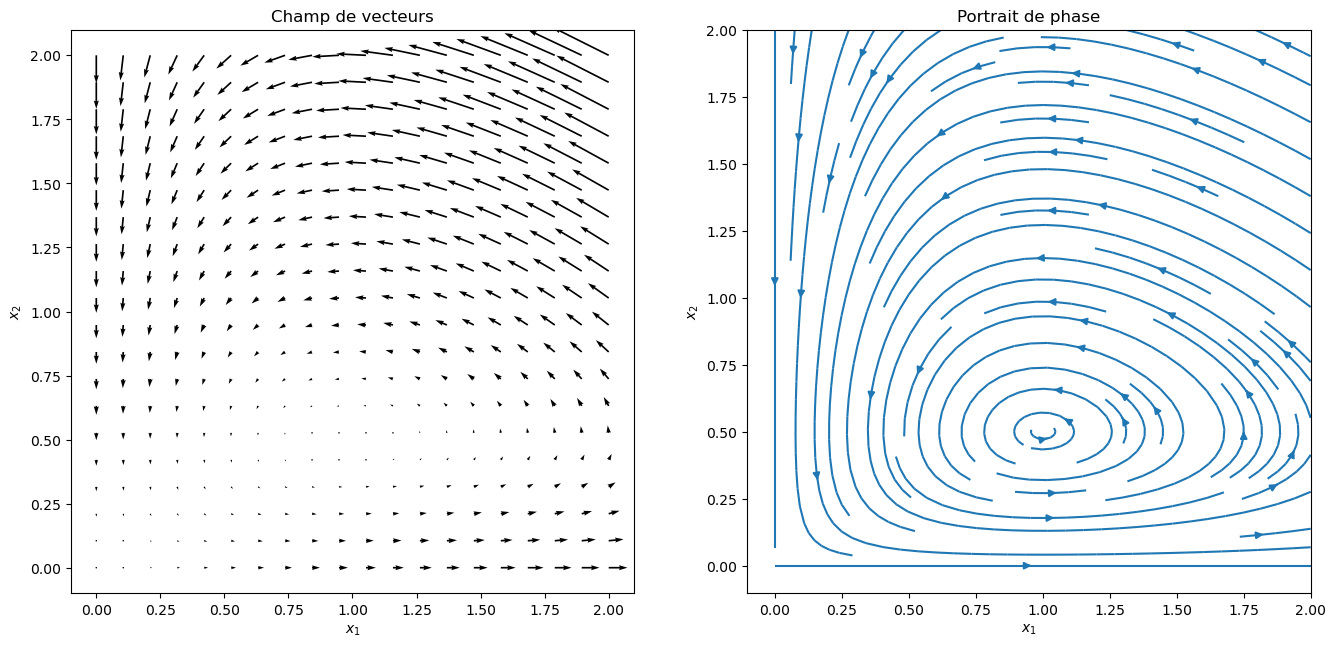

In [8]:
x = np.linspace(0, nb_max, nb_tot)
y = np.linspace(0, nb_max, nb_tot)
X,Y = np.meshgrid(x,y)
fX,fY = lk(X,Y)

ax1 = plt.subplot(1,2,1)
ax1.set_aspect('equal')
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.set_title('Champ de vecteurs')
q = ax1.quiver(X, Y, fX, fY)

ax2 = plt.subplot(1,2,2)
ax2.set_aspect('equal')
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')
ax2.set_title('Portrait de phase')
q2 = ax2.streamplot(X, Y, fX, fY);

Le champ de vecteurs met en évidence le comportement général des solutions du système d'équations différentielles, ainsi que certains points d'équilibre. Le portrait de phase permet de réaliser que les solutions sont périodiques, bornées, à la trajectoire fermée. On retrouve bien un point d'équilibre stable (sur l'exemple en $(1, 0.5)$).

## Question 3

On pose le problème de Cauchy suivant, pour $t_1 \in \R$ et $a \in \R$:
$$
(P)\textrm{ } \begin{cases}
       y\textrm{ vérifie } (E)\\
       y(t_1)=(0,a)
\end{cases}
$$

### Lemme intermédiaire

Posons 
$\begin{array}{ccccc}
y & : & \mathbb{R} & \to & \mathbb{R}^2 \\
 & & t & \mapsto &  
 \begin{pmatrix}
  0 \\
  a \exp (- \gamma (t - t_1)) \\
\end{pmatrix}
\\
\end{array}$

Alors $y$ vérifie $(P)$.

### Réponse à la question

Par l'absurde, supposons qu'il existe une solution $x = (x_1, x_2)$ initialisée en $x(t_0) \in (\R_{>0})^2$ pour laquelle il existe $t_2 \in \R$ tel que, sans perte de généralité, $x_1(t_2) \le 0$.

Puisque $x$ est continue, par le théorème des valeurs intermédiaires, il existe $t_1$ tel que $x_1(t_1)=0$.

D'une part, $x$ vérifie ce problème de Cauchy.

D'autre part, $y$ vérifie ce problème pour $a = x_2(t_1)$.

Par unicité, d'après le théorème de Cauchy-Lipschitz, $x_1 = 0$, puis $x_1(t_0) = 0$, ce qui est absurde.

Ainsi, toute solution initialisée dans $(\R_{>0})^2$ reste dans $(\R_{>0})^2$ sur son ensemble de définition.


## Question 4


### Dérivée

Soit $x$ vérifiant $(E)$ initialisée dans $(\R_{>0})^2$. On pose $h=H(x)$.

$f$ (définie à la question 1) est continue, donc d'après le théorème de Peano-Arzelà, on peut définir $x$ sur un intervalle $I$ d'intérieur non vide.

On calcule :

$$h'=\delta \dot{x_1} - \gamma \frac{\dot{x_1}}{x_1} + \beta \dot{x_2} - \alpha \frac {\dot{x_2}}{x_2} = 0 \textrm{ car } x \textrm{ vérifie } (E)$$

Donc $h = H_0 \in \R$ sur $I$.

### Solution maximale sur $\R$

Soit $x$ une solution maximale initialisée dans $(\R_{>0})^2$.

D'après le théorème du domaine maximal d'existence, $x$ est définie sur $]t_-, t^+[$ avec $(t_-, t^+) \in \overline{\R}^2$. Montrons que $t_- = -\infty$ et $t^+ = +\infty$.

Par l'absurde, sans perte de généralité, si $t_-$ est fini, alors :

#### Cas 1

Si $x \rightarrow +\infty$, alors $h \rightarrow +\infty$, ce qui est absurde.

#### Cas 2

On pose $X = (\R_{>0})^2$. D'après la question 3, on sait que $x$ reste dans $X$ et $\partial X = (\R_+ \times \{+\infty\}) \cup (\R_+ \times \{+0\}) \cup ( \{+\infty\} \times \R_+) \cup ( \{0\} \times \R_+)$.

Si $(t,x) \rightarrow (t_-, x_f)$ où $x_f \in \partial X$, alors $h \rightarrow \pm \infty$, ce qui est absurde.

Ainsi, toute solution maximale initialisée dans $X$ est définie sur $\R$.





## Question 5

In [9]:
def h(x1,x2):
    return delta*x1-gamma*np.log(x1)+beta*x2-alpha*np.log(x2)

In [10]:
def display_contour(f, x, y, levels): # cf projet numérique 1
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.title('Courbes de niveau de $H$')
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")

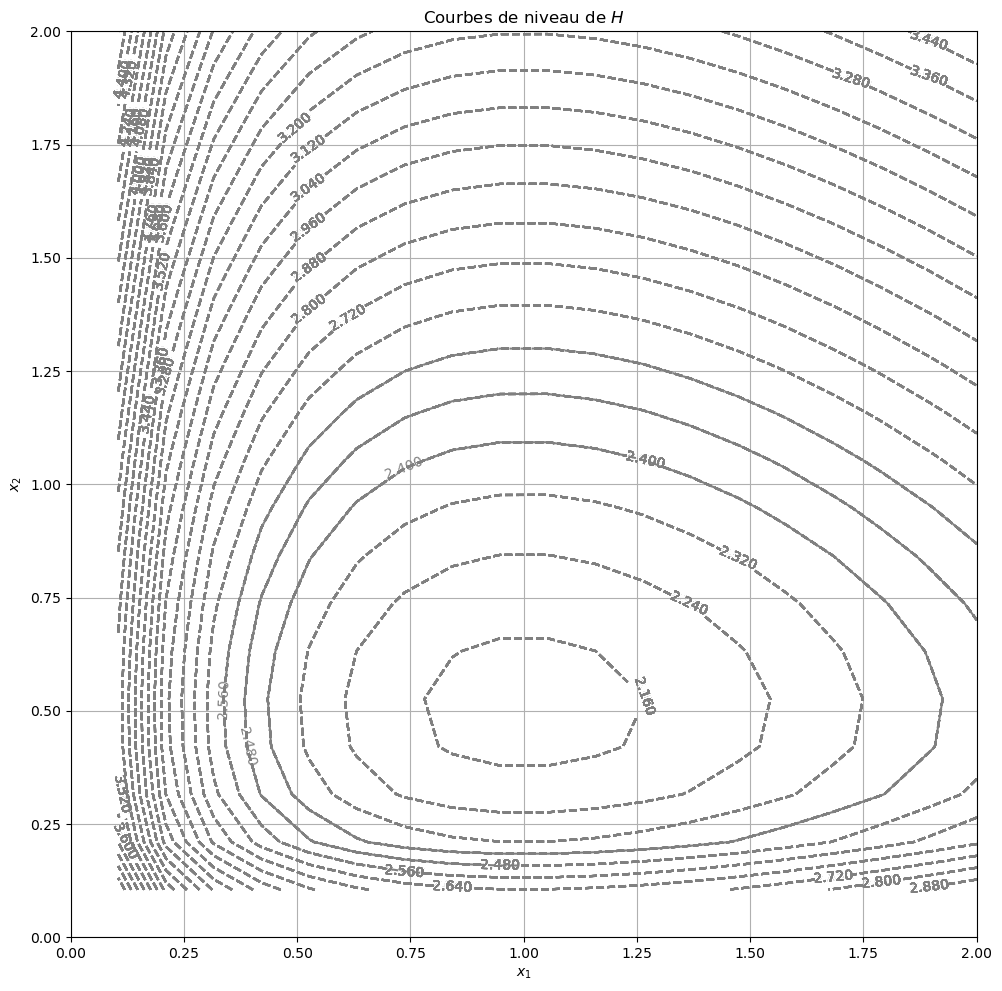

In [11]:
display_contour(h, X, Y, 30);

$\overline{x}$ semble au centre des lignes de niveau, en tant que minimum de la fonction $H$. Les courbes de niveau de $H$ ressemblent beaucoup au portrait de phase de la question 2. Les solutions suivent les lignes de niveau d'après la question 4, qui sont fermées. Elles sont bien périodiques et bornées.

Soit $\varepsilon > 0$. Montrons graphiquement qu'il existe $\eta > 0$ tel que pour tout $x_0$ vérifiant $|x_0 - \overline{x}| \le \eta$, la solution maximale $x$ passant par $x_0$ est définie sur $\R_{\ge 0}$ et vérifie $|x(t) - \overline{x}(t)| \le \varepsilon$.

- on dessine le cercle de rayon $\varepsilon$
- on constate que ce cercle contient entièrement un certain nombre de lignes de niveau, d'après le graphique précédent
- on prend pour $\eta$ la borne sup des distances de $\overline{x}$ à ces lignes de niveau
- on vérifie ainsi la propriété énoncée

Par conséquent, $\overline{x}$ est stable.

## Question 6

In [12]:
def liste_temps(t0, dt, tf): # pour obtenir exactement le bon nombre de points de temps, sans erreur d'arrondi...
    t = [t0]

    while t[-1] < tf:
        t_new = t[-1] + dt
        if (t_new < tf):
            t.append(t_new)
        else:
            t.append(tf)

    return t

def solve_euler_explicit(f, x0, dt, t0, tf):
    t = liste_temps(t0, dt, tf)    
    x = [x0]

    for tps in t[:-1]:
        x.append(x[-1] + dt*f(tps, x[-1]))
        
    return t, x

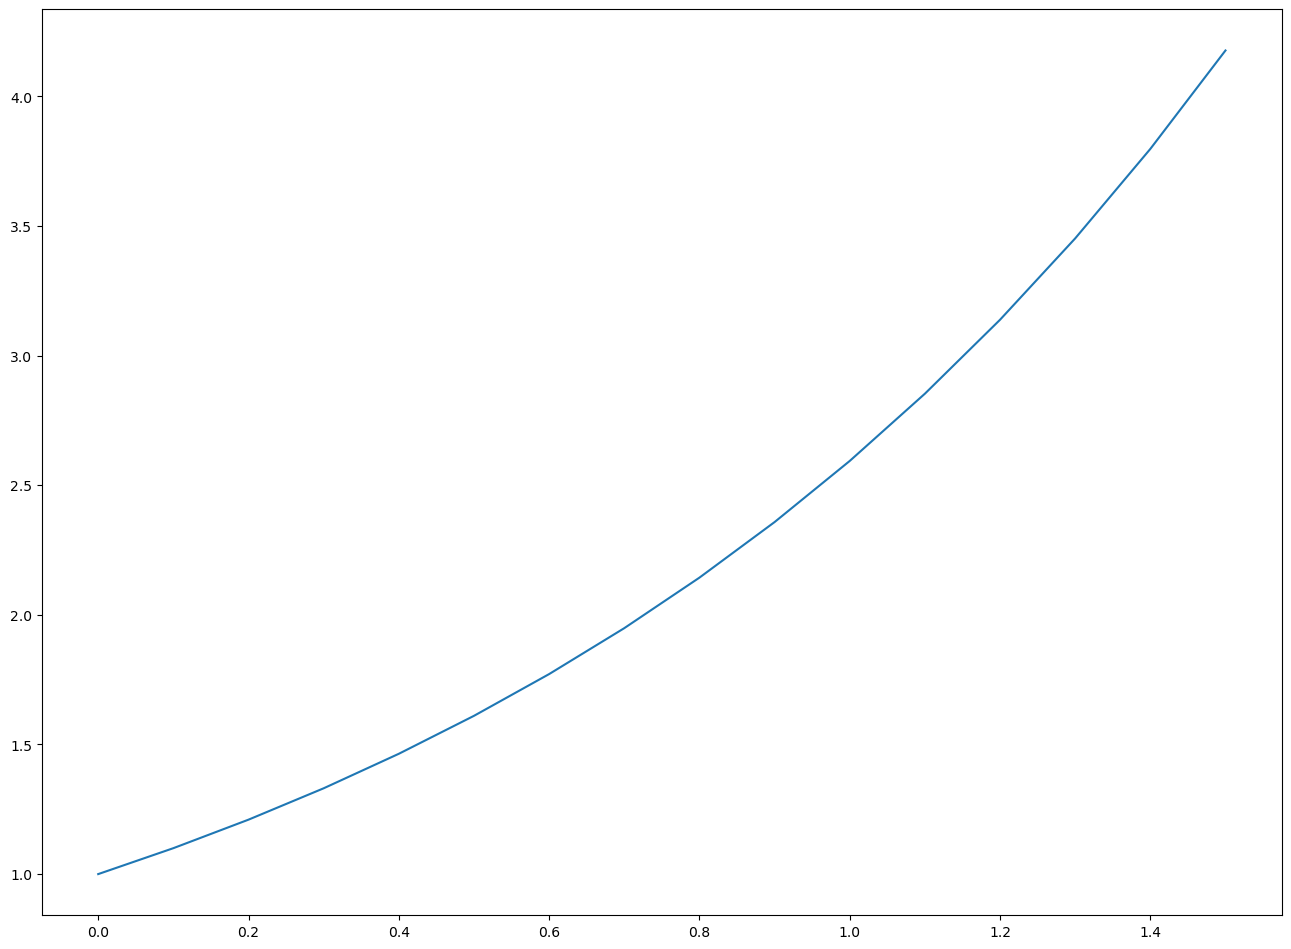

In [13]:
def f_exp(t, x): # f_exp(x)=x, correspond à la fonction exponentielle
    return x

t, x = solve_euler_explicit(f_exp, 1, 0.1, 0, 1.5) 

plt.plot(t, x);

### Ordre de convergence

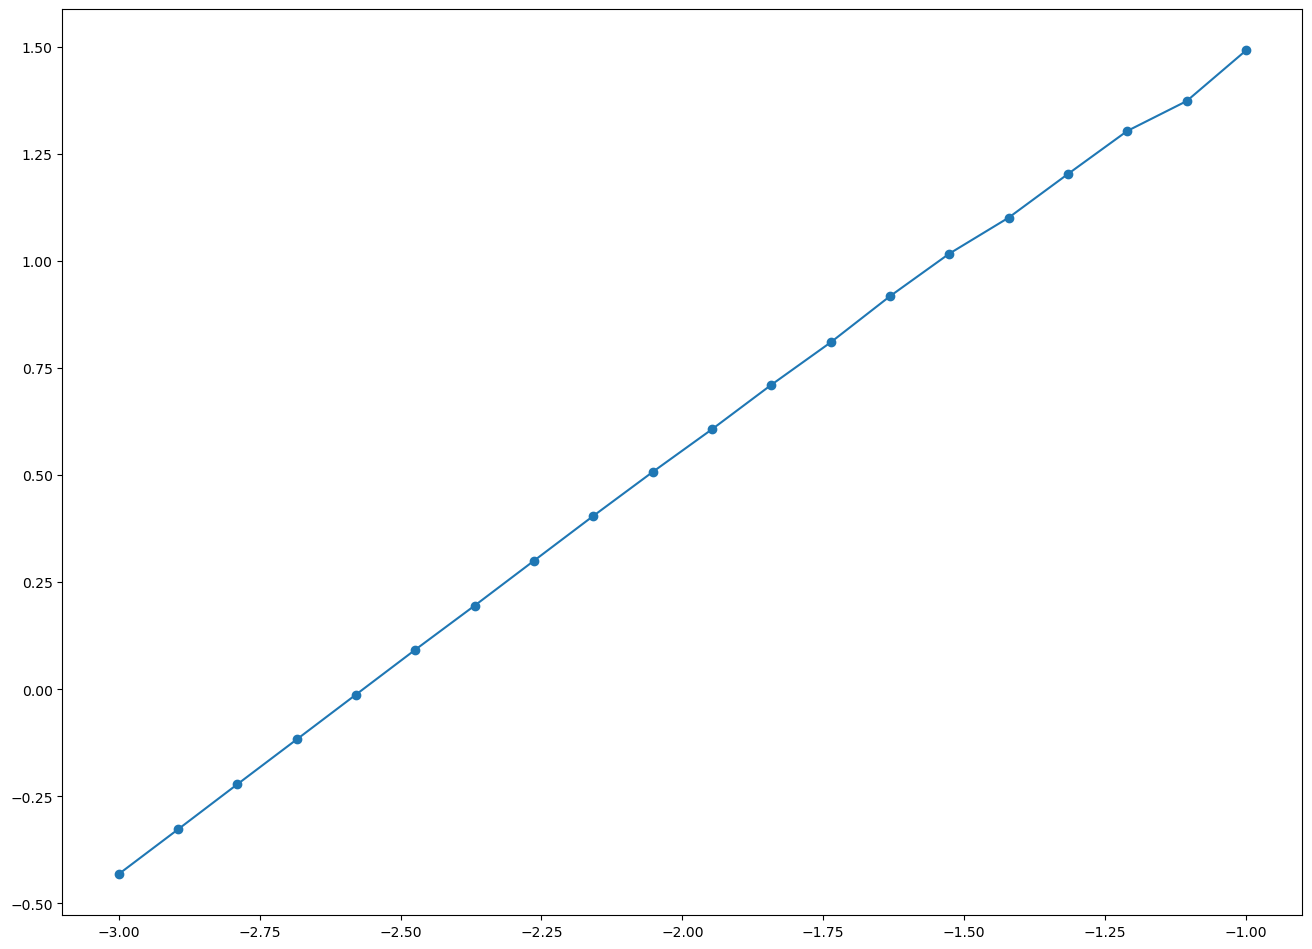

In [14]:
p = np.logspace(-3, -1, 20) # base 10
d = []

for ptmp in p:
    t, x = solve_euler_explicit(f_exp, 1, ptmp, 0, 5)

    md = 0 # recherche de la plus grande erreur
    for i in range(len(t)):
        diff = np.abs(np.exp(t[i]) - x[i])
        if diff > md:
            md = diff

    d.append(md)

plt.plot(np.log10(p), np.log10(d), '-o');




Le schéma converge bien lorsque $dt \rightarrow 0$.

On peut visualiser l'ordre de convergence en revenant à sa définition, en traçant le logarithme des erreurs maximales en fonction du pas de temps choisi.

On obtient bien l'allure d'une droite, ce qui confirme l'ordre de convergence de un pour le schéma d'Euler explicite. Nous n'avons pas utilisé des pas trop petits pour ne pas avoir des erreurs d'arrondi, ni des pas trop grands qui ne sont pas valables pour les développements limités lors de la méthode.

## Question 7

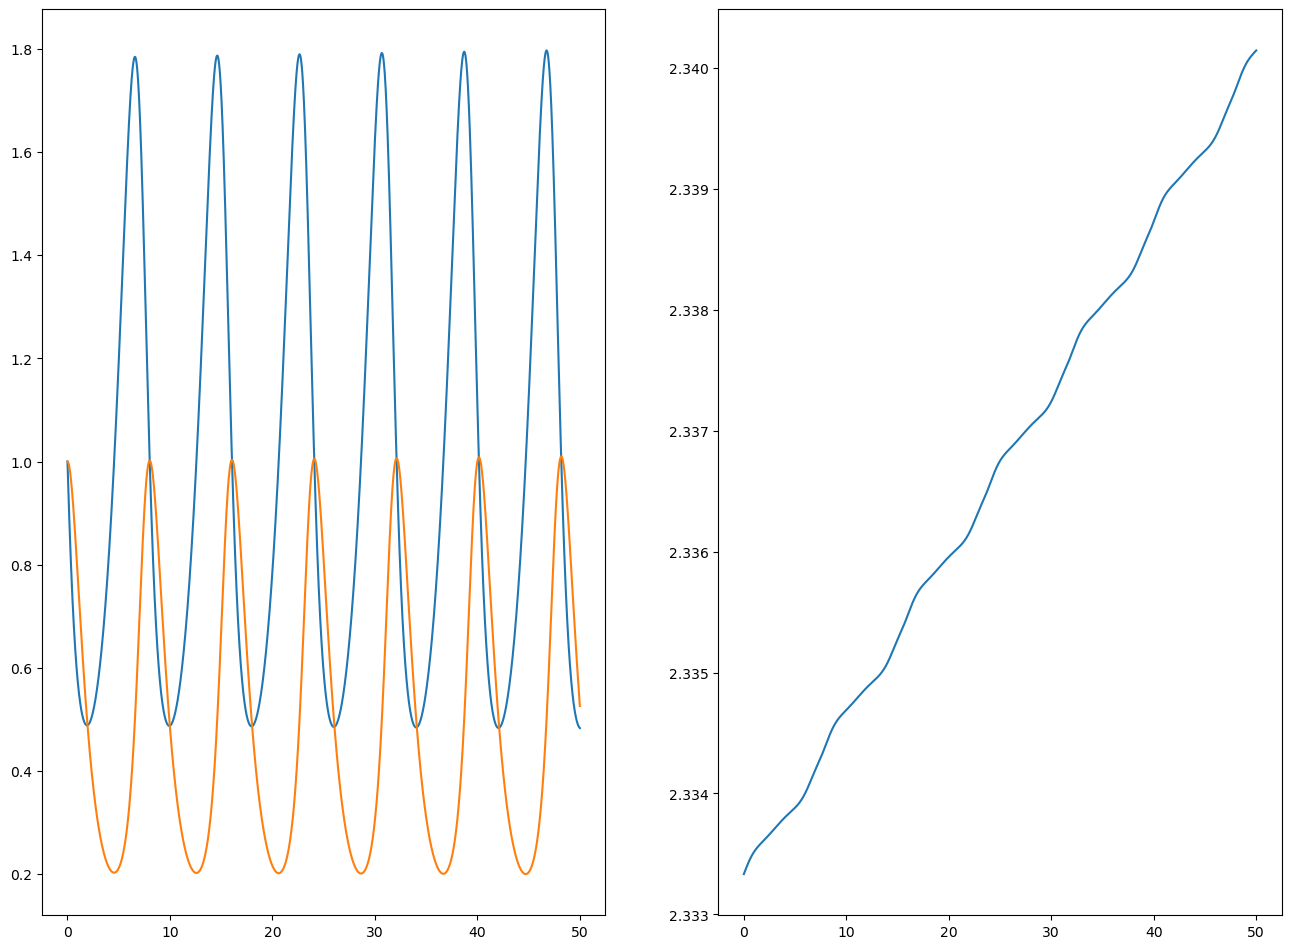

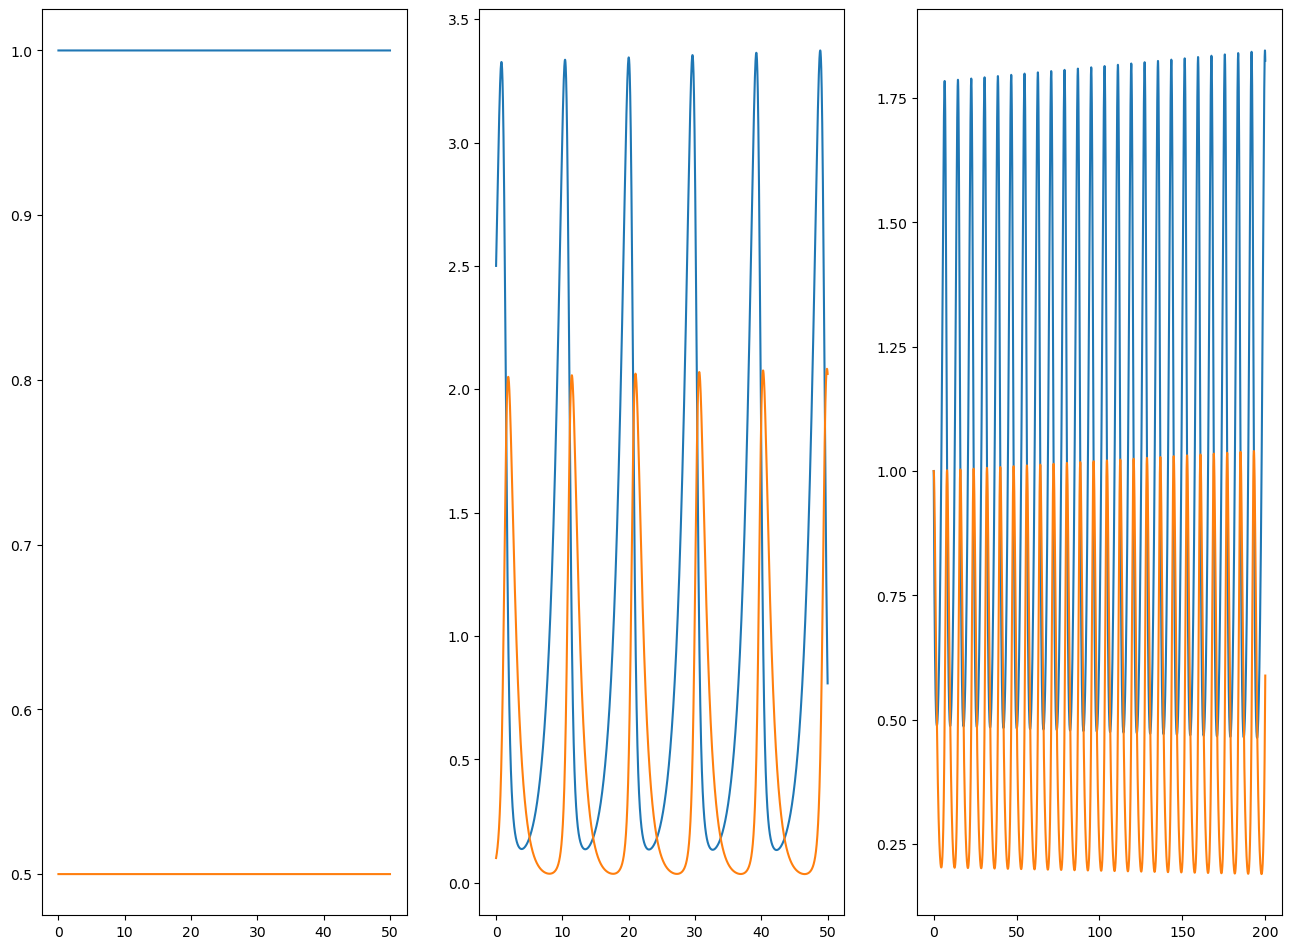

In [15]:
flk = (lambda tps, xt : lk(xt[0], xt[1])) # fonction pour le schéma numérique associée au système de lotka-volterra

ax1 = plt.subplot(1,2,1)
t, x = solve_euler_explicit(flk, [1.0, 1.0], 0.001, 0.0, 50)
ax1.plot(t, x); # une solution usuelle

ax2 = plt.subplot(1,2,2)
x=np.array(x)
ax2.plot(t, h(x[:,0], x[:,1])); # h pas du tout constante

plt.figure()
ax1 = plt.subplot(1,3,1)
t, x = solve_euler_explicit(flk, [1.0, 0.5], 0.001, 0.0, 50) # point fixe
ax1.plot(t, x);

ax2 = plt.subplot(1,3,2)
t, x = solve_euler_explicit(flk, [2.5, 0.1], 0.001, 0.0, 50) # autre point
ax2.plot(t, x);

ax3 = plt.subplot(1,3,3)
t, x = solve_euler_explicit(flk, [1.0, 1.0], 0.001, 0.0, 200)
ax3.plot(t, x); # résolution à un temps un peu plus long

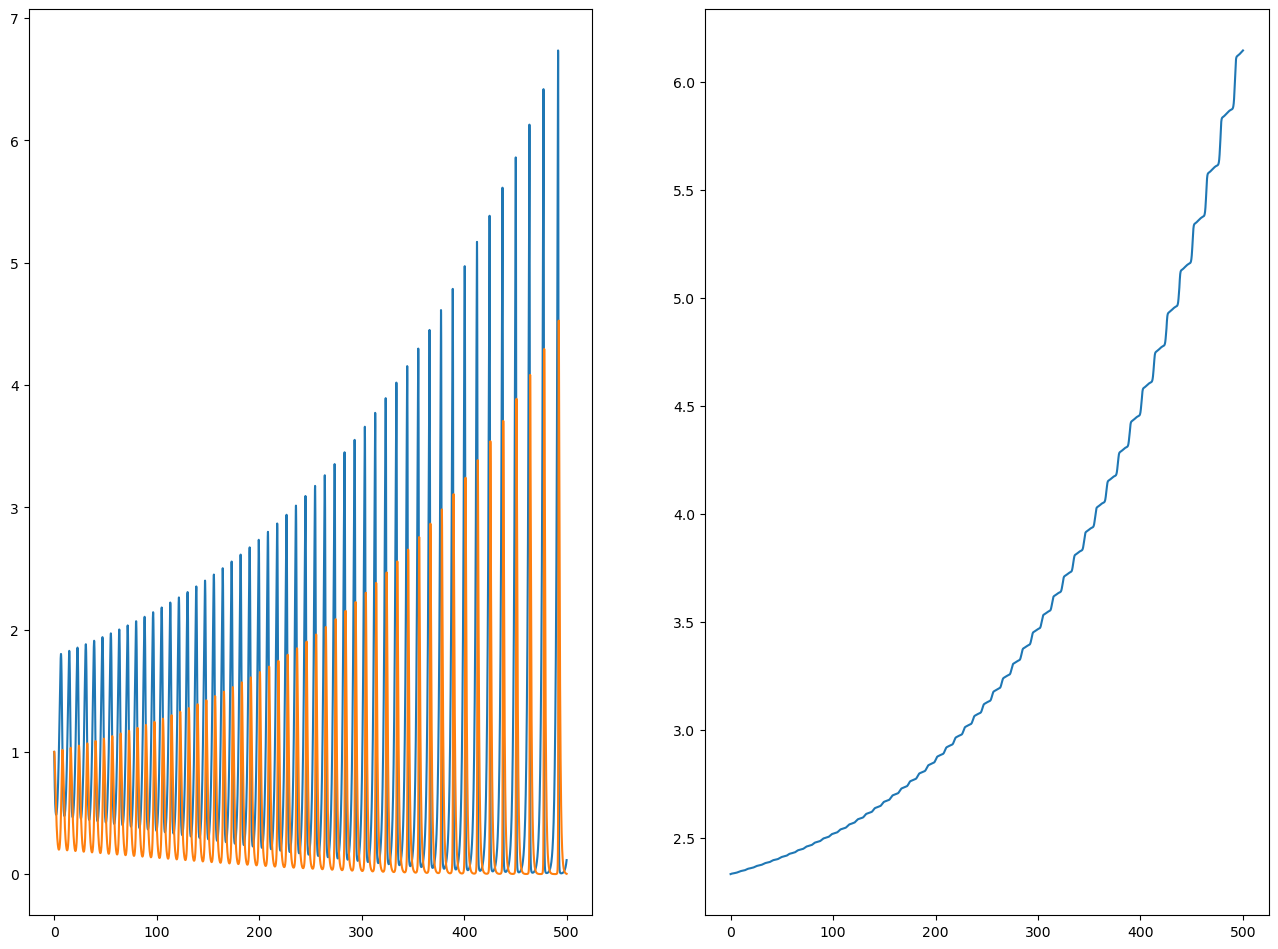

In [16]:
# Temps très long

ax1 = plt.subplot(1,2,1)
t, x = solve_euler_explicit(flk, [1.0, 1.0], 0.01, 0.0, 500)
ax1.plot(t, x);

ax2 = plt.subplot(1,2,2)
x=np.array(x)
ax2.plot(t, h(x[:,0], x[:,1])); # h pas du tout constante : sorte d'exponentielle

En temps long, la solution ne semble pas périodique : elle a plutôt l'air de diverger.

Non, cette résolution est en contradiction avec les questions 2 et 4. L'évolution de $H$ montre que $h$ n'est pas constant, ce qui signifie que l'invariant du système n'est pas respecté et conduit à la non-périodicité des solutions (le système est alors instable).

## Question 8

In [17]:
def solve_euler_implicit(f, x0, dt, t0, tf, itermax = 100): # le seuil est non défini, on fait donc pour chaque valeur 100 itérations
    t = liste_temps(t0, dt, tf)
    x = [x0]

    for i,tps in enumerate(t[:-1]):
        x_exp = (x[-1] + dt*f(t[i+1], x[-1])) # erreur poly t^j+1 au lieu de t^j

        for _ in range(itermax): # méthode du cours
            x_exp = x[-1] + dt*f(t[i+1], x_exp)
        x.append(x_exp)

    return t, x

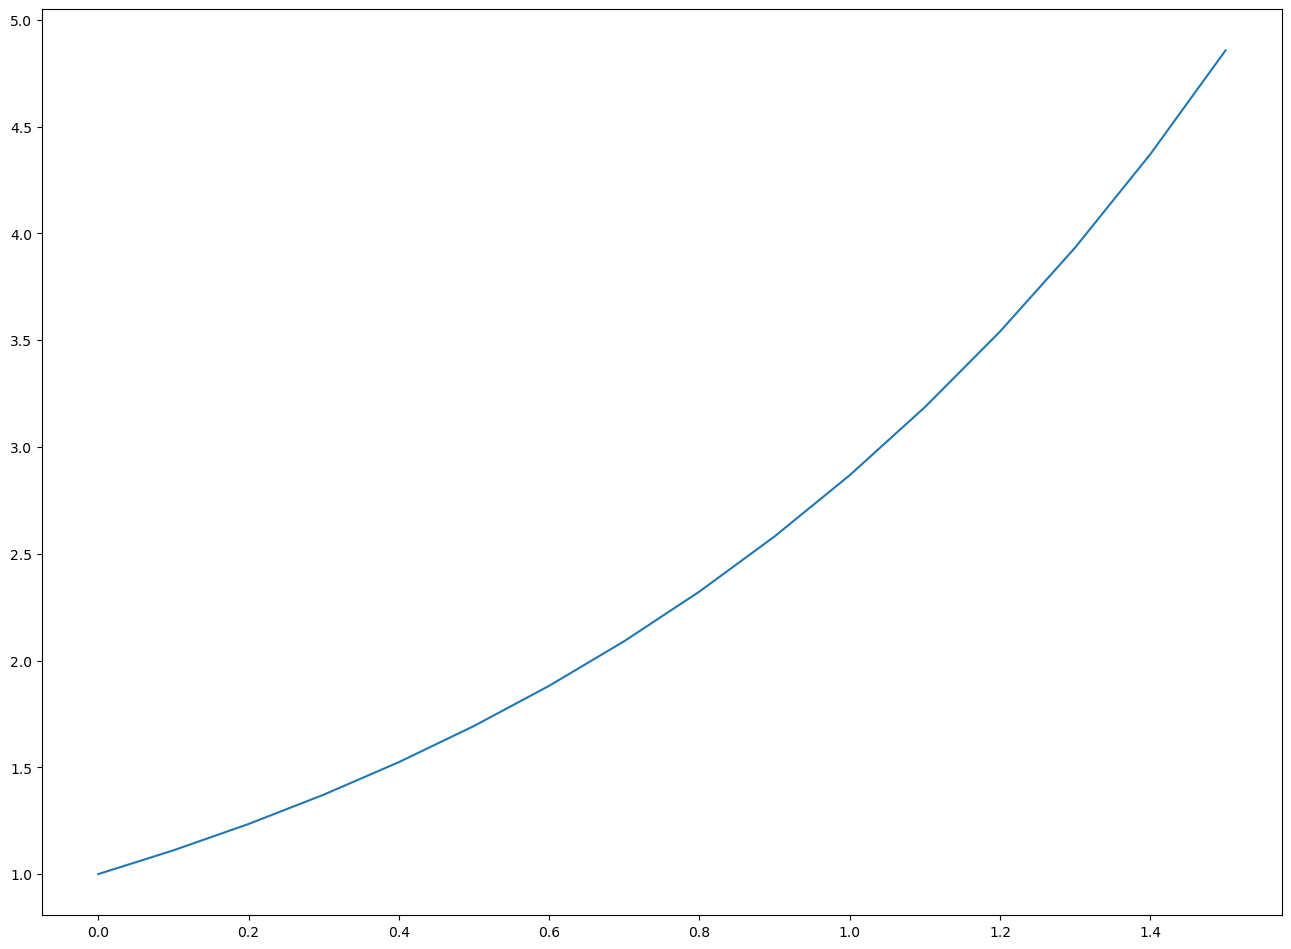

In [18]:
def f_exp(t, x): # f_exp(x)=x, correspond à la fonction exponentielle
    return x

t, x = solve_euler_implicit(f_exp, 1, 0.1, 0, 1.5) 

plt.plot(t, x);

Cela converge bien sur des solutions connues comme l'exponentielle.

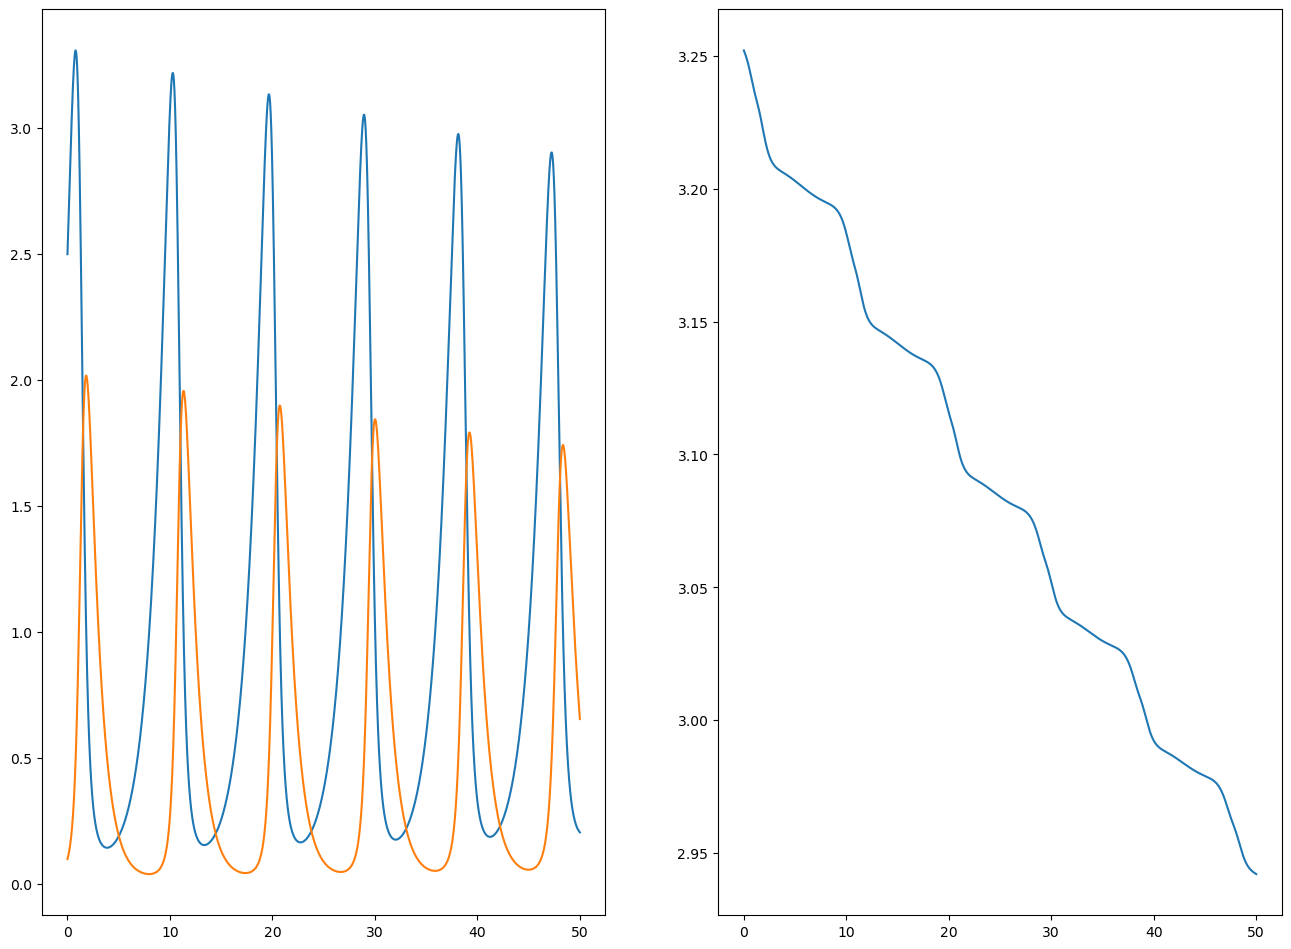

In [19]:
plt.figure()
ax1 = plt.subplot(1,2,1)
t, x = solve_euler_implicit(flk, [2.5,0.1], 0.01, 0.0, 50) 
plt.plot(t, x);
ax2 = plt.subplot(1,2,2)
x=np.array(x)
ax2.plot(t, h(x[:,0], x[:,1])); # h pas du tout constante

Sur les équations de Lotka-Volterra, on constate que $H$ diminue au lieu d'augmenter comme pour Euler explicite, mais n'est toujours pas conservé : ce n'est pas une méthode satisfaisante.

## Question 9

On pose :
$$
\forall u = (u_1, u_2) \textrm{ continûment différentiable, } (E_u)\textrm{ : } \begin{cases}
        \dot{x}_1 &= x_1(\alpha -\beta x_2) - u_1(x_1,x_2) (H(x_1,x_2)-H_0) \\
 \dot{x}_2 &= -x_2(\gamma - \delta x_1) - u_2(x_1,x_2) (H(x_1,x_2)-H_0) 
\end{cases}
$$
et $(E')$ : pour tout $u$ continûment différentiable, $x$ vérifie $(E_u)$.

Soit $x$ une solution de $(E)$. Alors, d'après la question 4, $\forall (x_1, x_2)$, $H(x_1, x_2) = H(x(0))$. Donc pour tout $u$ continûment différentiable, $(E_u) = (E)$ donc $x$ est solution de $(E')$.

Soit $x$ une solution de $(E')$. Alors $x$ est solution de $(E_0) = (E)$, donc $x$ est solution de $(E)$.

Par double inclusion, on en déduit que les solutions sont identiques.


## Question 10

Soit $x = (x_1, x_2)$ une solution de $(E')$. Posons $g=(H-H_0)(x)$. On considère la solution $x$ initialisée dans $(\R_{>0})^2$.

On calcule, avec la règle de la différentiation en chaine :

$$
\begin{align*}
\nabla H(x_1, x_2) &= \begin{bmatrix}
           \delta - \frac{\gamma}{x_1}\\
           \beta - \frac{\alpha}{x_2}
         \end{bmatrix}\\

\textrm{ d'où } g' &= \nabla H (x) \cdot \begin{bmatrix}
                                            \dot{x_1}\\
                                            \dot{x_2}
                                \end{bmatrix}\\
                  &= -(H-H_0)\left[\nabla H(x) \cdot u\right] \textrm{ d'après la question 4 car } x \textrm{ vérifie } (E) \textrm{ (vu à la question 9)}
\end{align*}
$$

Soit $k \in \R$. On pose $u = k \nabla H(x)$ pour avoir $g'=-k \norme{\nabla H(x)}^2(H(x)-H_0)$. $u$ est bien définie car $x_1 > 0$ et $x_2 > 0$ d'après la question 3.

Supposons que $\forall t \in \R$, $d(x(t), \overline{x}) > 0$. Alors $\forall t \in \R$, $x(t) \neq \overline{x}$.

Montrons que $g$ converge exponentiellement vers $H_0$ lorsque $t \rightarrow +\infty$. Soit $t_0 \in \R$ (les solutions sont définies sur $\R$ d'après la question 4).

Tout d'abord, posons $v = \norme{\nabla H(x)}^2$ et $\Delta H = H(x) - H_0$.

D'après la question 5, $x$ est bornée (sinon $H$ n'est pas constante). Par continuité de $x$, $x(\R)$ est inclus un segment. La fonction $\norme{\nabla H}^2$ étant continue sur un segment, elle est bornée d'après le théorème des bornes atteintes.

Donc il existe $(a,b) \in \R^2$ tels que $a \le v \le b$.

Par l'absurde, s'il existe $t \in \R$, $(\Delta H)(t)= 0$, alors $g'$ est nulle en ce point. D'après la question 5, c'est un minimum de $H$ (et ainsi de $H-H_0$), donc $x(t)=\overline{x}$, ce qui est absurde.
 
Supposons, sans perte de généralité, que $\Delta H > 0$. Alors $-k a \Delta H \ge \dfrac{d (\Delta H)}{dt} \ge -k b \Delta H$.

On intègre à la physicienne, après séparation des variables, par croissance de l'intégrale, avec $t_0=0$ : 
$\exp (-kat) \ge \dfrac{(\Delta H)(t)}{(\Delta H)(0)} \ge \exp (-kbt)$

Ainsi, lorsque $t \rightarrow +\infty$, $(\Delta H)(t) \rightarrow 0$ de manière exponentielle.



## Question 11

On utilise le système précédemment introduit, avec le $u$ déterminé et l'on utilise la méthode d'Euler implicite ou explicte. D'une part, d'après la question 10, $H$ va tendre exponentiellement vers $H_0$, ce qui assurera la conservation de l'invariant aux temps longs, et d'autre part, la solution obtenue sera bien solution du système de Lotka-Volterra d'après la question 9. La stabilité de la solution sera donc assurée, par rapport aux méthodes précédentes.

Le paramètre $k$ représente la vitesse de convergence exponentielle de $H$ vers $H_0$. S'il est faible, $H$ converge lentement vers $H_0$. S'il est grand, cela converge théoriquement plus vite. Cependant, si $k$ est trop grand, la correction sera trop forte par rapport au pas de temps, et cela ne convergera plus avec la méthode d'Euler, comme le montre le calcul suivant :

On considère une méthode d'Euler explicite avec l'équation différentielle de la question 10.

$\begin{align*}
\forall j, H(x^{j+1})-H_0 &= H(x^j)-H_0 + dt \cdot (-k) \cdot \norme{\nabla H (x^j)}^2(H(x^j)-H_0)\\
&= (H(x^j) - H_0) \left( 1 - k \cdot dt \cdot \norme{\nabla H (x^j)}^2 \right)                            
\end{align*}$

On pose $\lambda = \norme{\nabla H (x^j)}^2 \ge 0$.

Si l'on considère $\lambda$ presque constant (gradient borné d'après la question 10 sous les bonnes hypothèses, on peut prendre sa borne inférieure), on reconnait une suite géométrique de raison $1-k \lambda \cdot dt$, qui converge vers 0 si et seulement si $|1-k\lambda\cdot dt| < 1$, c'est-à-dire lorsque $0 < k < \dfrac{2}{\lambda \cdot dt}$.




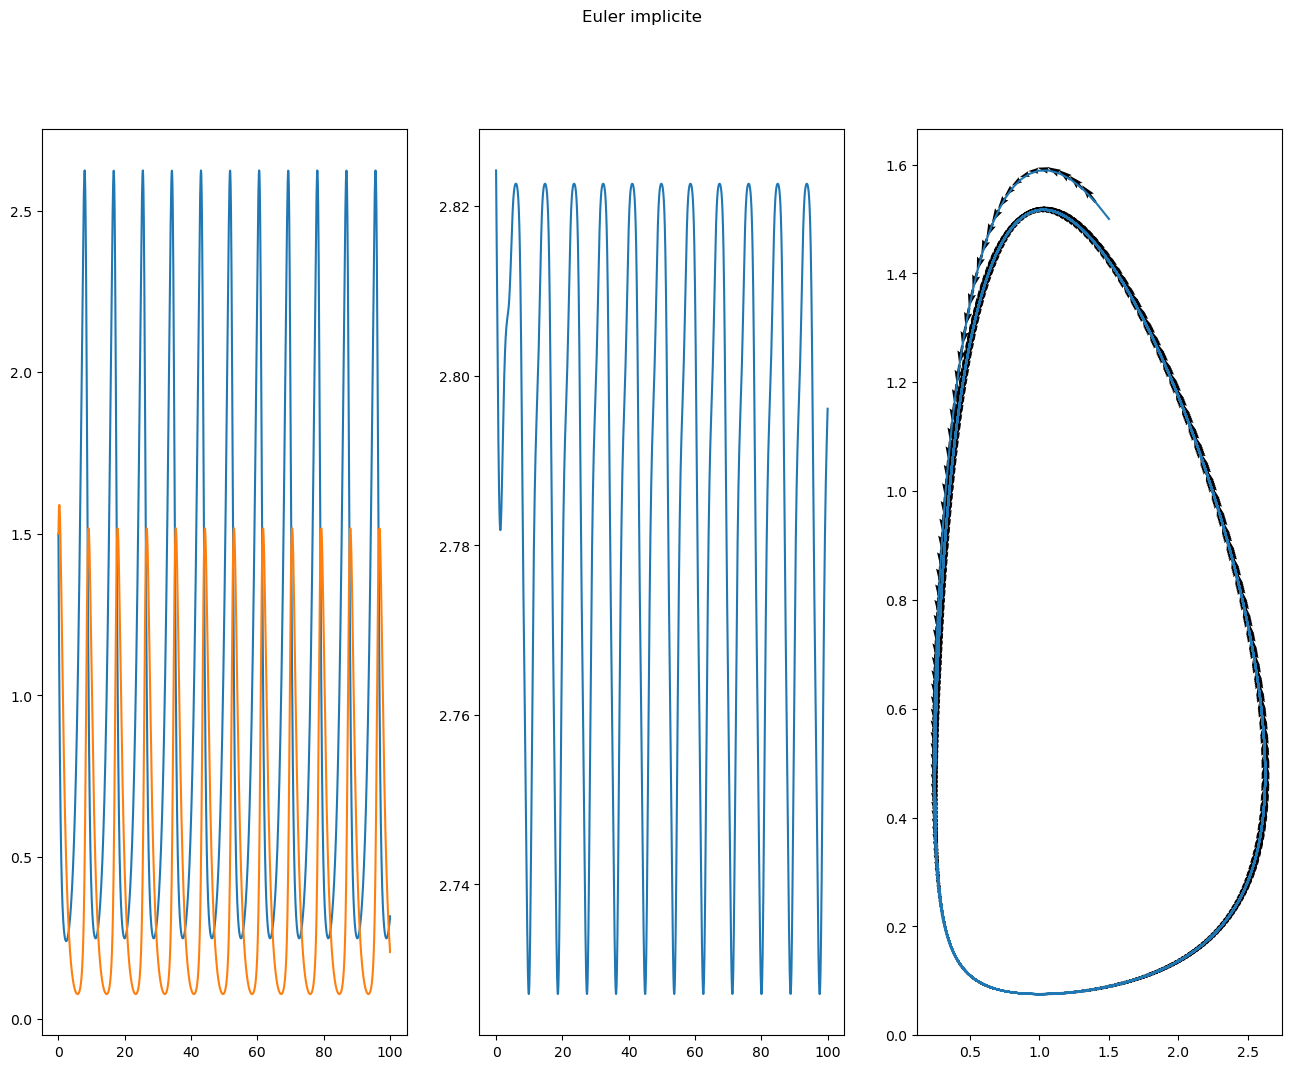

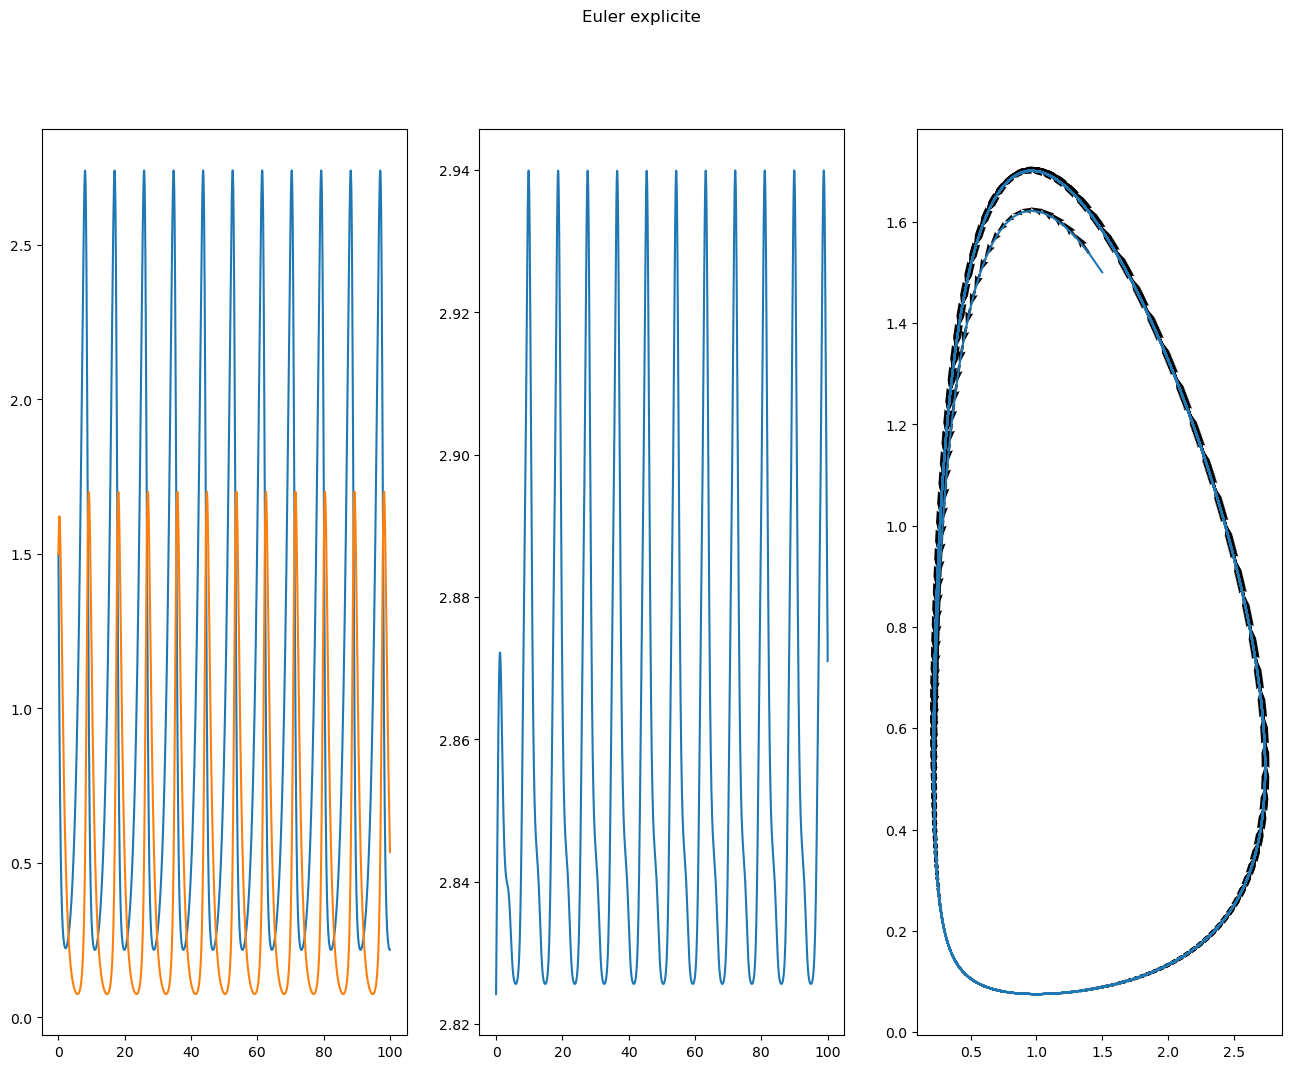

In [20]:
# La cellule prend une vingtaine de secondes à s'exécuter

x0 = [1.5,1.5]
k = 0.1 #1 #8.7 (trop) #0.01 (convergence très lente)

# Autre jeu de paramètres pour le test
# alpha =1
# beta =0.5
# gamma = 0.5
# delta = 0.5
# x0 = [2,2]
# k = 5

def lk2(u, h, h0): # fonction pour le schéma numérique correspondant au nouveau système
    def f(x1, x2):
        hc = h(x1, x2)
        u1, u2 = u(x1, x2)
        return np.array([x1*(alpha-beta*x2)-u1*(hc-h0),-x2*(gamma-delta*x1)-u2*(hc-h0)])
    return f

u = lambda x1, x2 : k*np.array([delta-gamma/x1, beta-alpha/x2])

ax1 = plt.subplot(1,3,1)
t, x = solve_euler_implicit((lambda tps, xt : lk2(u, h,     h(*x0))(xt[0], xt[1])),     x0, 0.05, 0, 100, 10) # 10 itérations pour accélérer le calcul
ax1.plot(t, x);

ax2 = plt.subplot(1,3,2)
x=np.array(x)
ax2.plot(t, h(x[:,0], x[:,1]));

ax3 = plt.subplot(1,3,3)
ax3.plot(x[:,0], x[:,1]);
for i, (xa, xb) in enumerate(x[1:]):
    plt.quiver(xa, xb, xa-x[i][0], xb-x[i][1], scale_units='xy', angles='xy', scale=1)
plt.suptitle("Euler implicite");

### -------------------------------------

plt.figure()
ax1 = plt.subplot(1,3,1)
t, x = solve_euler_explicit((lambda tps, xt : lk2(u, h,     h(*x0))(xt[0], xt[1])),     x0, 0.05, 0, 100)
ax1.plot(t, x);

ax2 = plt.subplot(1,3,2)
x=np.array(x)
ax2.plot(t, h(x[:,0], x[:,1]));

ax3 = plt.subplot(1,3,3)
ax3.plot(x[:,0], x[:,1]);
for i, (xa, xb) in enumerate(x[1:]):
    plt.quiver(xa, xb, xa-x[i][0], xb-x[i][1], scale_units='xy', angles='xy', scale=1)
plt.suptitle("Euler explicite");


Le schéma se stabilise avec les deux méthodes rapidement comme le montre les portraits de phase.